## RQ 5

#### The most influential users are the ones with the highest number of “followers", you can now look more into their activity

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [1]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


#### 5.1 Plot the top 10 most popular users in terms of followers and their number of posts.

##### The dataframe was organized to only obtain the necessary columns. .nlargest() was used to select the 10 most popular usersbased on followers

In [2]:
top10 = profiles_df[['profile_id', 'profile_name', 'followers', 'n_posts']] \
    .nlargest(10, 'followers')
    
top10

,profile_id,profile_name,followers,n_posts
2880218,2.502532e+07,instagram,285457645.0,5760.0
2582507,3.416684e+06,victoriassecret,65269440.0,7355.0
3820939,2.082449e+07,nba,35339708.0,28816.0
701965,1.876191e+08,louisvuitton,30689316.0,3352.0
2414951,2.125507e+09,buzzfeedtasty,30246783.0,2791.0
2785241,4.968651e+08,andresiniesta8,29542143.0,990.0
333193,2.341008e+07,hm,29176804.0,4566.0
3934581,2.423993e+07,princessyahrini,29042823.0,4719.0
1311970,5.041706e+07,danbilzerian,26476004.0,1311.0
1703764,9.070254e+08,akshaykumar,26252169.0,1173.0


##### pd.plot() and the subplot attribute were used to get the top 10 most popular users in terms of number of posts and followers. Subplot was used because the scale of y values ​​differed by a large number and therefore it was not possible to correctly represent both attributes in the same plot.

##### More props at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

array([<AxesSubplot:title={'center':'n_posts'}, xlabel='profile_name'>,
       <AxesSubplot:title={'center':'followers'}, xlabel='profile_name'>],
      dtype=object)

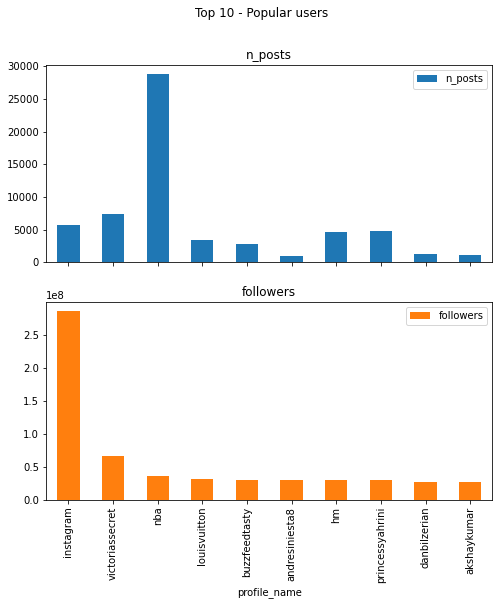

In [3]:
top10.plot(x='profile_name', y=['n_posts', 'followers'], kind='bar', subplots=True, 
           title='Top 10 - Popular users', figsize=(8, 8)) # , layout=(1, 2), sharey=True)

#### 5.2 Who is the most influential user?

##### Assuming that the most influential user is the one with the largest number of followers, the "Instagram" user is the most influential as it has 285M followers with 5.7K posts.

In [4]:
top10.head(1)

,profile_id,profile_name,followers,n_posts
2880218,25025320.0,instagram,285457645.0,5760.0


#### 5.3 Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

##### .astype('int32') was used to convert the "profile_id" column format to integers.

In [6]:

selected_profile_ids = top10.profile_id.astype('int32').to_list()

##### Through the for loop and the established chunksize, we search for all the posts that are related to the 10 most influential profiles.

In [8]:
from tqdm import tqdm

posts_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[chunk.profile_id.isin(selected_profile_ids)]
    
    posts_list.append(filtered)


86it [04:03,  2.83s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "posts_df"

In [9]:
from functools import reduce

posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)

posts_df.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from p

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
266570,28641534,336492,Ss3ULFBQeM,25025320.0,5.332856e+06,2012-12-01 17:42:03.000,1,"On December 1st, 1955, in Montgomery, Alabama ...",125428.0,1240.0
659635,29042650,336492,BeECzRuh1O6,25025320.0,5.873874e+08,2018-01-17 20:59:30.000,1,Photo by @jameswhitlowdelano\nAfter traveling ...,669786.0,4818.0
1441841,29834978,336492,Brl3hGMAxiy,25025320.0,8.770667e+14,2018-12-20 03:03:13.000,1,Photo by @overrated_outcast\nOne word you can’...,1914299.0,20065.0
1559527,29952957,337097,BFrYARaRh55,20824486.0,6.294880e+05,2016-05-21 19:30:19.000,1,Who else is hoopin' today?,164521.0,1415.0
2410579,30815147,336492,BZNHb3ijnDT,25025320.0,3.500213e+08,2017-09-19 03:56:12.000,1,Photo by @keepingwiththetimes\nA cheerful burs...,840588.0,3627.0


##### A backup CSV file is saved

In [11]:
posts_df.to_parquet('posts_df.parquet.snappy')
posts_df.to_csv('posts_df.csv')

posts_top10_df = posts_df

##### A "groupby" by Profile ID and Location ID is made to find out how many different Location IDs were used per profile. Therefore, the answer to the question is: 91 different tag locations were used by the 10 most popular profiles.

In [12]:
locations_posts_count = posts_top10_df \
    .groupby(['profile_id', 'location_id'], dropna=True) \
    .agg(count=('post_id', 'count'))
    
locations_posts_count.reset_index(inplace=True)

locations_posts_count = locations_posts_count \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64', 'count' : 'int32'})

locations_posts_count

,profile_id,location_id,count
0,3416684,262606339,1
1,3416684,116531305845344,1
2,3416684,189331311669042,1
3,3416684,252960988517436,1
4,3416684,302612476852048,1
...,...,...,...
87,496865116,179370,1
88,496865116,366902078,3
89,496865116,2019565374753966,1
90,907025384,1653066228336077,1


##### The base "posts_top10_df_location" is prepared to later perform a merge and find the most visited areas and cities according to the ID Location.

In [13]:
locations_df = pd.read_csv('instagram_locations.csv', delimiter='\t')

posts_top10_df_location = posts_top10_df[['post_id','profile_id','location_id']]
posts_top10_df_location = posts_top10_df_location.dropna()

posts_top10_df_location = posts_top10_df_location \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64'})

posts_top10_df_location    

,post_id,profile_id,location_id
266570,Ss3ULFBQeM,25025320,5332856
659635,BeECzRuh1O6,25025320,587387369
1441841,Brl3hGMAxiy,25025320,877066659067597
1559527,BFrYARaRh55,20824486,629488
2410579,BZNHb3ijnDT,25025320,350021298
...,...,...,...
41532427,BswHrnTB2HN,25025320,838523900
41608204,Bi7wE8uBWNI,25025320,1011688667
41874115,rdbaZkRhzl,20824486,244021299
42211393,Bf4WZMdljVZ,20824486,433604130


##### pd.merge() was used to merge the CSV Instagram Locations using the Location ID.

In [14]:
location_post_area = pd.merge(left=posts_top10_df_location, right=locations_df, left_on='location_id', right_on='id')
location_post_area

,post_id,profile_id,location_id,sid,id,name,street,zip,city,region,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,Ss3ULFBQeM,25025320,5332856,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
1,BeECzRuh1O6,25025320,587387369,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
2,Brl3hGMAxiy,25025320,877066659067597,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
3,BFrYARaRh55,20824486,629488,808150,629488,David Crombie Park,131 The Esplanade,M5A 4P5,"Toronto, Ontario",NaN,...,Saint Lawrence,saint-lawrence,CA,Canada,-79.368635,43.648486,NaN,david-crombie-park,http://www1.toronto.ca/parks/prd/facilities/co...,2019-06-01 19:46:51.479
4,BZNHb3ijnDT,25025320,350021298,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,BswHrnTB2HN,25025320,838523900,709981,838523900,Stanislaus National Forest,NaN,NaN,"Lodi, California",NaN,...,NaN,NaN,NaN,NaN,-121.291619,38.139407,NaN,stanislaus-national-forest,http://www.fs.usda.gov/main/stanislaus/home,2019-05-28 14:07:28.559
101,Bi7wE8uBWNI,25025320,1011688667,712659,1011688667,Leuser Ecosystem,Leuser,NaN,"Blangpidi, Aceh, Indonesia",NaN,...,NaN,NaN,NaN,NaN,96.847161,3.743398,NaN,leuser-ecosystem,http://leuserecosystem.org,2019-05-28 17:05:17.449
102,rdbaZkRhzl,20824486,244021299,722170,244021299,InfoCision Stadium–Summa Field,427 Nash St,44304,"Akron, Ohio",NaN,...,NaN,NaN,NaN,NaN,-81.508443,41.072518,NaN,infocision-stadiumsumma-field,http://www.gozips.com/athletics/facilities/Inf...,2019-05-29 03:39:14.795
103,Bf4WZMdljVZ,20824486,433604130,734424,433604130,The Toyta Center,1510 Polk St,77010,"Houston, Texas",NaN,...,Downtown Houston,downtown-houston,US,United States,-95.362071,29.750773,NaN,the-toyta-center,www.houstontoyotacenter.com,2019-05-29 16:21:10.297


##### The most frequent areas are obtained by a "groupby" using the Location Name and a counter used in the post_id. The most visited areas by the 10 most popular influencers are Sydney, Australia and Victoria's Secret.

In [16]:
locations_frequent_area = location_post_area \
    .groupby(['name']) \
    .agg(count=('post_id', 'count'))
    
locations_frequent_area.reset_index(inplace=True)

locations_frequent_area.nlargest(10, 'count')

,name,count
70,"Sydney, Australia",9
80,Victoria's Secret,4
37,"Kobe-shi, Hyogo, Japan",3
9,Bel-Air Estate,2
11,"Bora Bora, French Polynesia",2
81,Wells Fargo Center,2
0,666 Fifth Avenue,1
1,ARIA Poker Room,1
2,AZULIK Tulum,1
3,Amsterdam Forest,1


##### To obtain the plot of visits by city, a "groupby" is first made by city and a post_id counter. Then, the cities are sorted in descending order using a pd.sort_values ​​with respect to the number of visits. Finally, pd.plot() was used to obtain the plot shown below.

<AxesSubplot:title={'center':'Cities visited'}, xlabel='City', ylabel='Number of times visited'>

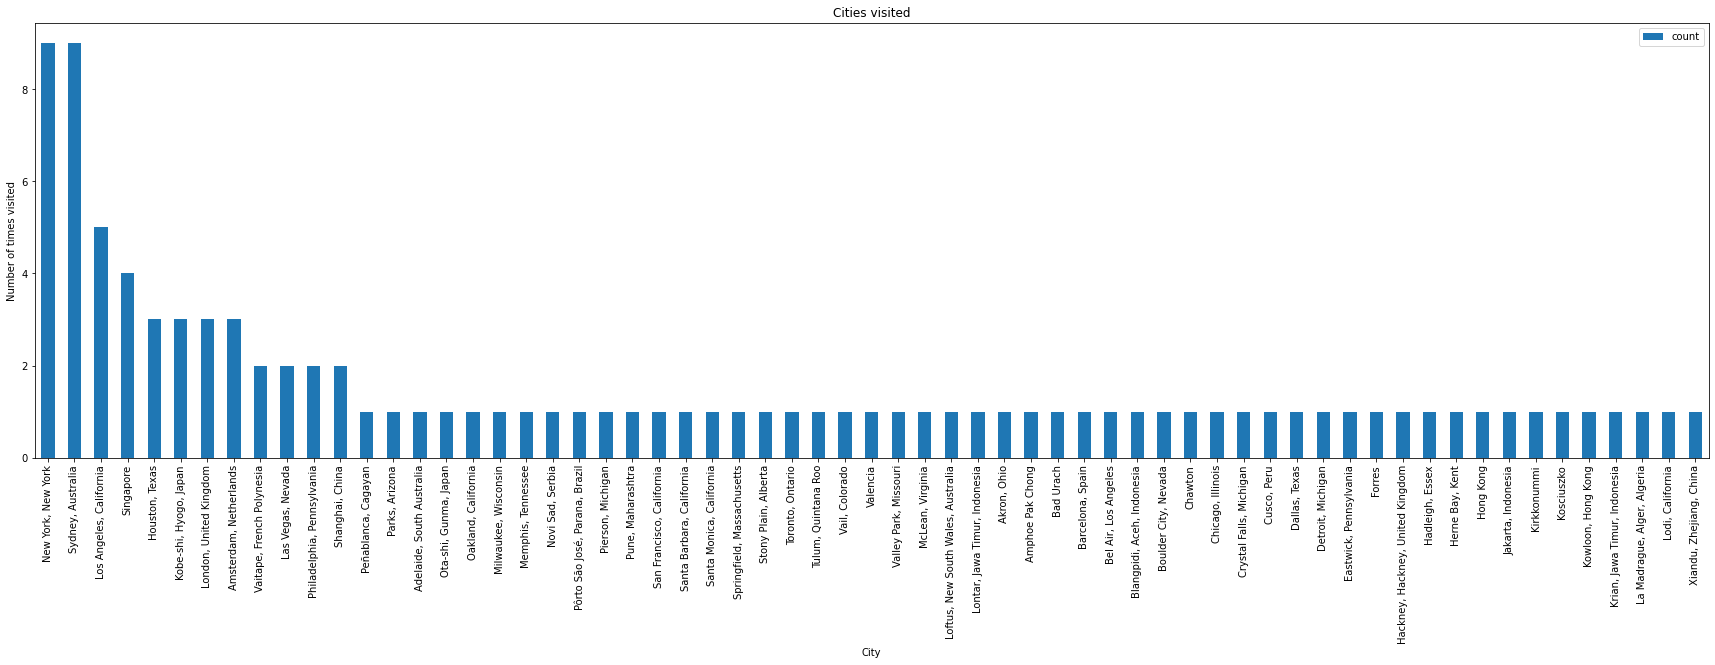

In [17]:
#Count on City

locations_city_count =location_post_area \
    .groupby(['city'], dropna=True) \
    .agg(count=('post_id', 'count'))

locations_city_count.reset_index(inplace=True)

#Order from highest to lowest with respect to visits
locations_city_count.sort_values(by='count', ascending=False, inplace=True)

#Plot each time city has been visit 
locations_city_count.plot(x='city', y='count', kind='bar', 
           title='Cities visited', figsize=(30, 8),
           xlabel='City', ylabel='Number of times visited')


#### 5.4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

##### A "groupby" was used per post_type and a counter of the post_id was used to calculate the total number of post types. Then, a pd.plot.pie was used and through the "autopct" attribute the option to show the percentage was enabled. From the final result, it can be concluded that 90.8% of the posts made by the 10 most influential people contain only pictures and 9.2% contain only videos. There is no post that contains both post types together. Therefore, it can be inferred that the world population prefers to use platforms like Instagram to post mostly photos and leave other apps to watch videos.



<AxesSubplot:title={'center':'Post Types'}, ylabel='count'>

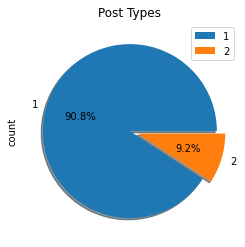

In [19]:
#Pictures Only - Post type = 1
#Videos Only - Post type = 2
#Both - Post type =3
post_type_count =posts_top10_df \
    .groupby(['post_type']) \
    .agg(count=('post_id', 'count'))

post_type_count.plot.pie(y='count', title='Post Types', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

### 5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

##### To answer the first question, a "group by" per type of post is used and then the number of likes and comments obtained by each type of post is added.

##### It can be concluded that posts that only contain pictures have a higher number of acceptance and interactions with followers. Post type 1 has 69M likes vs. Post type 2 has 3M likes, obtaining a ratio of 95.8% against 4.2%. 
##### Regarding the comments, Post type 1 has approximately 500k comments vs. Post type 2 that has 26k, obtaining a ratio of 95.6% vs 4.4%. Thus maintaining the ratio obtained in the previous analysis.


In [20]:
#Number of likes and comments per post_type
post_type_landc =posts_top10_df \
    .groupby(['post_type']) \
    .agg(sum_likes=('numbr_likes', 'sum'), sum_comments=('number_comments', 'sum'))

post_type_landc


,sum_likes,sum_comments
post_type,,
1,69285634.0,497013.0
2,3464814.0,26258.0


##### A pd.merge() was used to fetch the number of followers using the profile_id key.

In [22]:
#Join posts and profile
followers_likes_posts = pd.merge(left=posts_top10_df, right=top10, left_on='profile_id', right_on='profile_id')


##### A .groupby() was used for profile_name and post_type along with the calculation of the average number of likes and comments and the number of followers per profile. Finally, the final DataFrame is ordered by the number of followers in descending order.

##### The final result shows what was previously analyzed. The number of likes is much higher than the number of comments on all the 10 most popular profiles.

##### It is also evident that, with the exception of the "Instragram" profile, there is no direct relationship between the number of likes and comments along with the number of followers. For example, "andresiniesta8" has fewer followers compared to the profile "victoriassecret" and still has on average a higher number of likes on their comments and videos.

In [148]:
#Average number of likes and comments per post_type per top 10 user
post_type_landc =followers_likes_posts \
    .groupby(['profile_name','post_type']) \
    .agg(mean_likes=('numbr_likes', 'mean'), mean_comments=('number_comments', 'mean'), followers=('followers','mean'))

post_type_landc.reset_index(inplace=True)

post_type_landc  = post_type_landc  \
    .astype({'mean_likes' : 'int64','mean_comments' : 'int64','followers': 'int64'})

post_type_landc.sort_values(by='followers', ascending= False)

,profile_name,post_type,mean_likes,mean_comments,followers
5,instagram,1,905933,6703,285457645
6,instagram,2,593409,5749,285457645
12,victoriassecret,1,230749,438,65269440
13,victoriassecret,2,261408,583,65269440
8,nba,1,242235,1087,35339708
9,nba,2,207295,1026,35339708
7,louisvuitton,1,186857,867,30689316
2,buzzfeedtasty,1,100862,963,30246783
1,andresiniesta8,1,473022,2237,29542143
4,hm,1,81213,365,29176804
